Возьмите из прошлого домашнего задания ряд — стационарный и не стационарный.
Приблизьте оба варианта моделями из класса MA.
Оцените качество и пришлите соображения, почему была выбрана та или иная модель.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Загружаем стационарный ряд
daily_total_female_births = pd.read_csv('D:/Учеба/16. Временные ряды/1. Знакомство с временными рядами/daily-total-female-births-in-cal.csv')
#Загружаем не стационарный ряд
int_airline_passengers = pd.read_csv('D:/Учеба/16. Временные ряды/1. Знакомство с временными рядами/international-airline-passengers.csv')

In [3]:
int_airline_passengers = int_airline_passengers.dropna()

In [4]:
all_series = {
    "International airline passengers: monthly totals in thousands": int_airline_passengers['Count'],
    "Daily total female births in California": daily_total_female_births['Count']
}

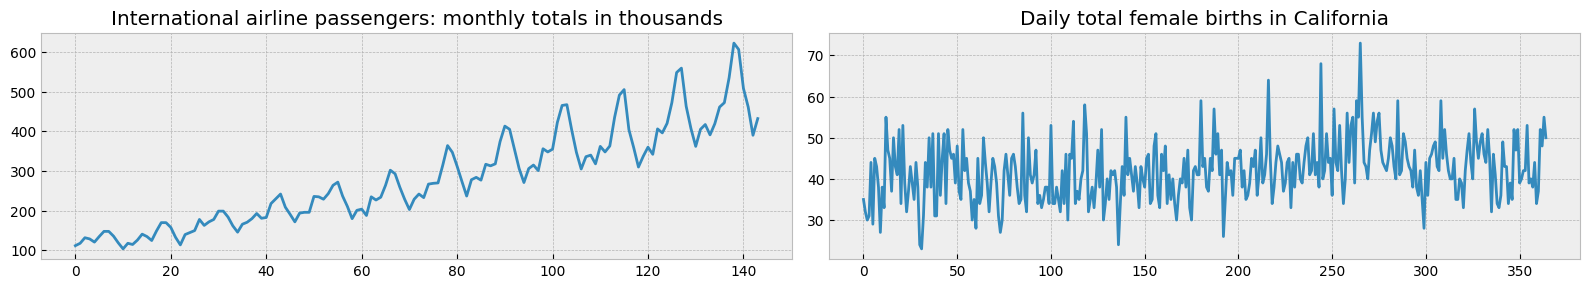

In [5]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax)
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [6]:
series1 = int_airline_passengers['Count']
series2 = daily_total_female_births['Count']

In [7]:
#Скользящее среднее

In [8]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

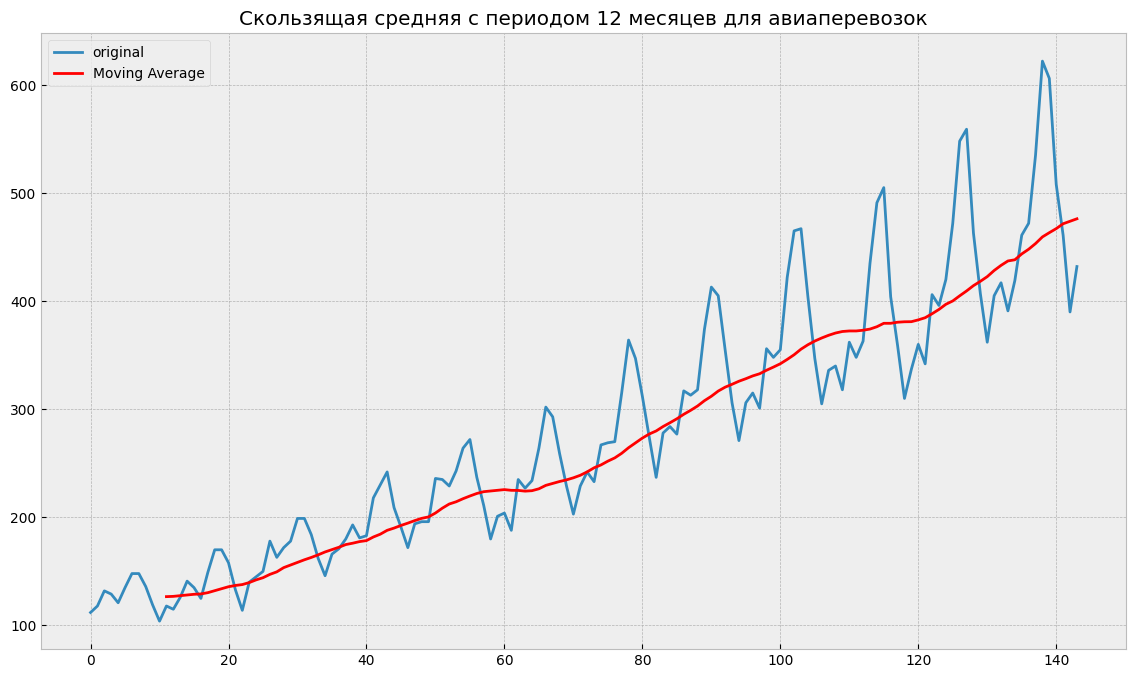

In [9]:
ser = moving_average(series1, 12)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series1, label='original')
    plt.plot(ser, color='red', linewidth='2', label='Moving Average')
    plt.title('Скользящая средняя с периодом 12 месяцев для авиаперевозок')
    plt.legend()

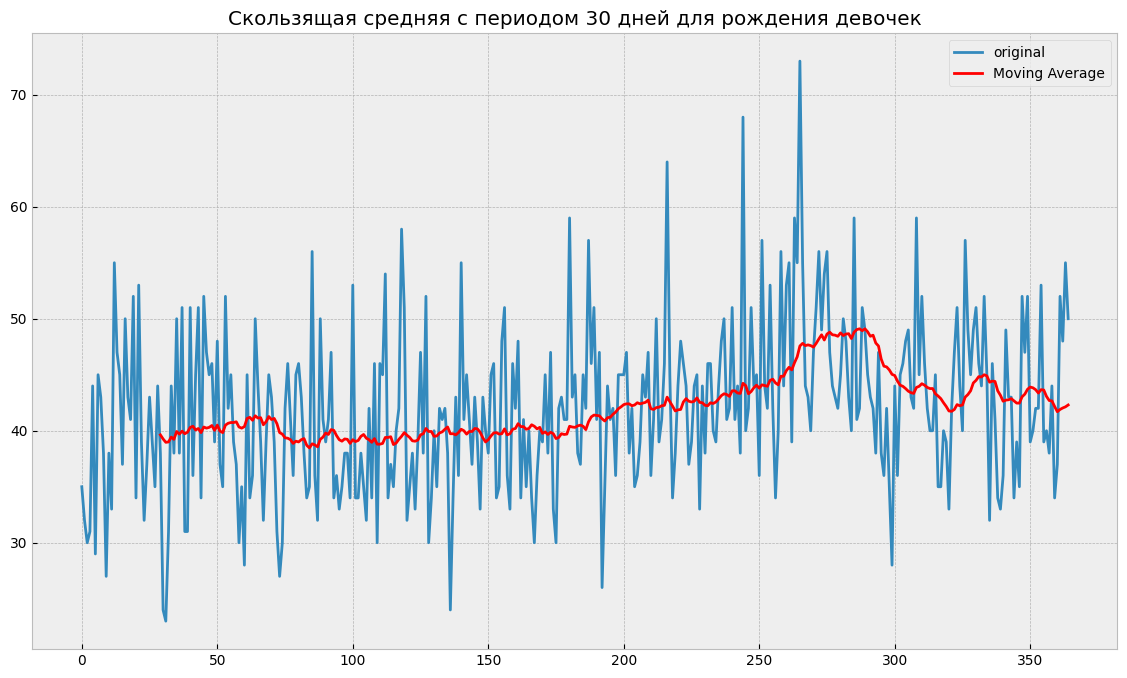

In [10]:
ser = moving_average(series2, 30)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series2, label='original')
    plt.plot(ser, color='red', linewidth='2', label='Moving Average')
    plt.title('Скользящая средняя с периодом 30 дней для рождения девочек')
    plt.legend()

In [11]:
#Сделаем предсказание

In [12]:
def predict(series, N, n_pred):
    new_series = series.copy()
    for _ in range(n_pred):
        mean_value = new_series[-N:].mean()
        new_series = pd.concat([new_series, pd.Series([mean_value])], ignore_index=True)
    return new_series

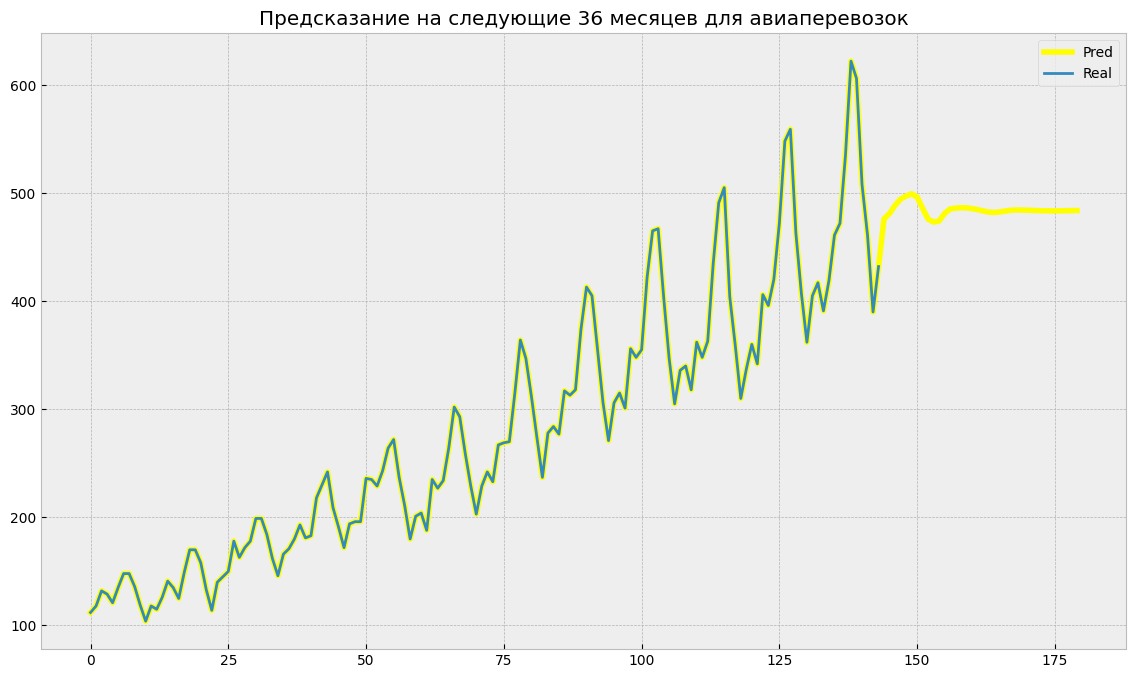

In [13]:
series_pred = predict(series1, 12, 36)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_pred, color='yellow', linewidth='4', label='Pred')
    plt.plot(series1, linewidth='2', label='Real')
    plt.legend()
    plt.title('Предсказание на следующие 36 месяцев для авиаперевозок')
    plt.show()

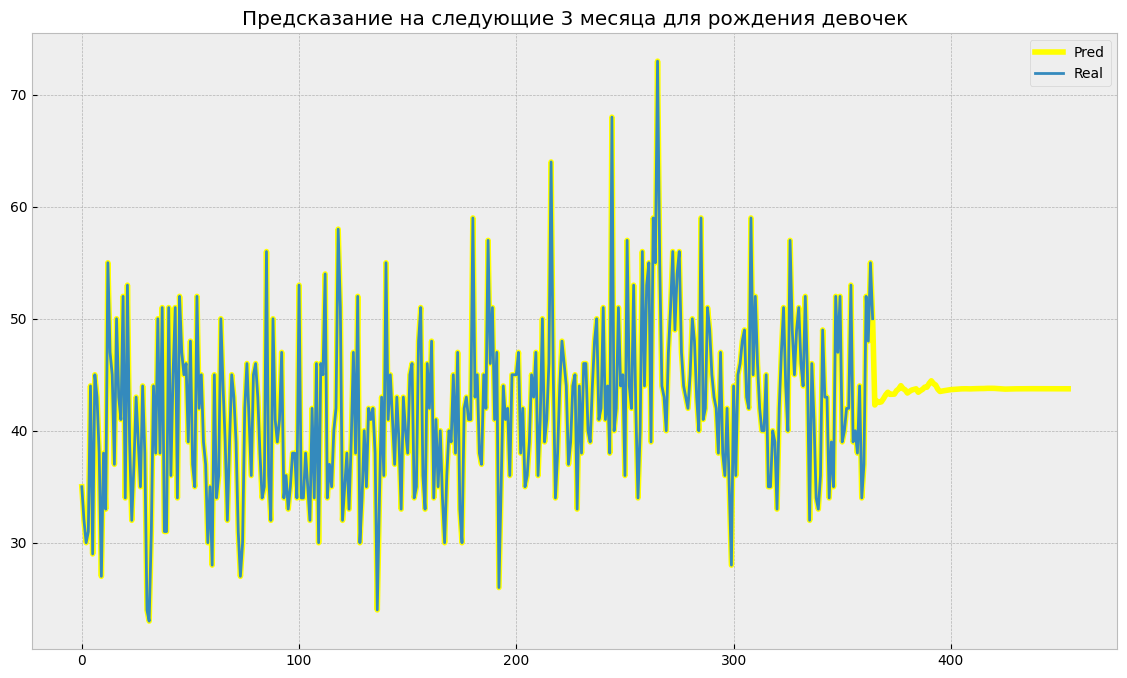

In [14]:
series_pred = predict(series2, 30, 90)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_pred, color='yellow', linewidth='4', label='Pred')
    plt.plot(series2, linewidth='2', label='Real')
    plt.legend()
    plt.title('Предсказание на следующие 3 месяца для рождения девочек')
    plt.show()

In [15]:
#Чем больше размер "окна" скользящего среднего 
#тем более сглаженным получается результат. По нескольким скользящим средним можно увидеть периоды резкого роста и резкого спада.

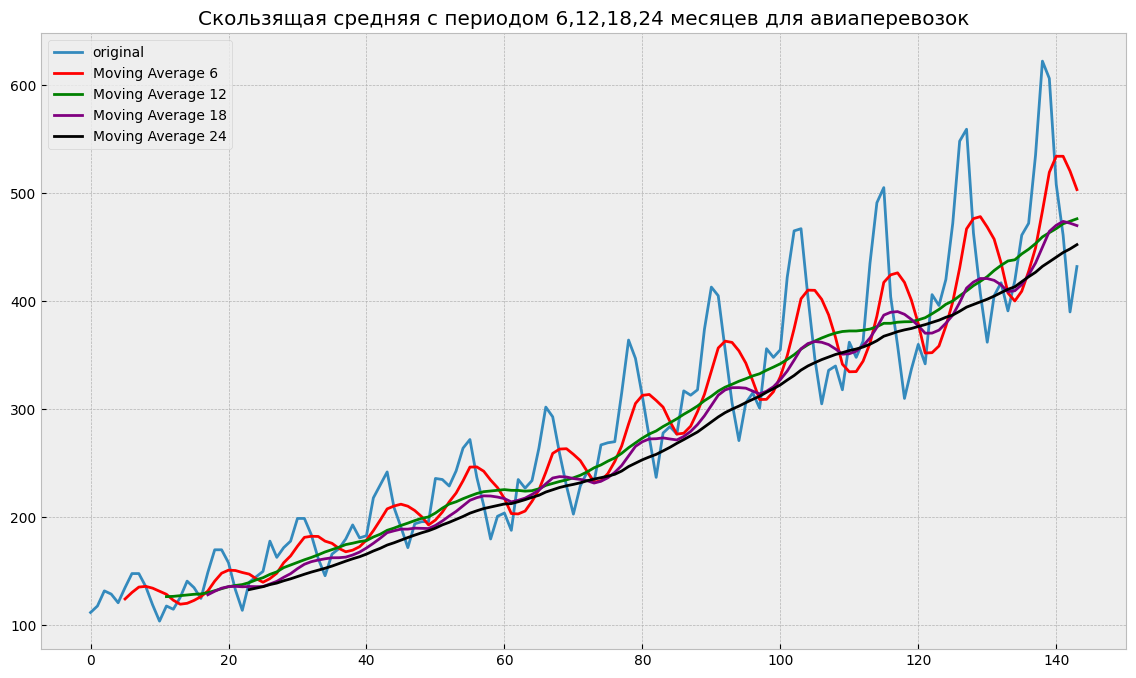

In [16]:
windows = [6,12,18,24]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series1,label='original')
    for i in range(len(windows)):
        ser = moving_average(series1, windows[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='Moving Average {}'.format(windows[i]))
    plt.title('Скользящая средняя с периодом 6,12,18,24 месяцев для авиаперевозок')
    plt.legend()

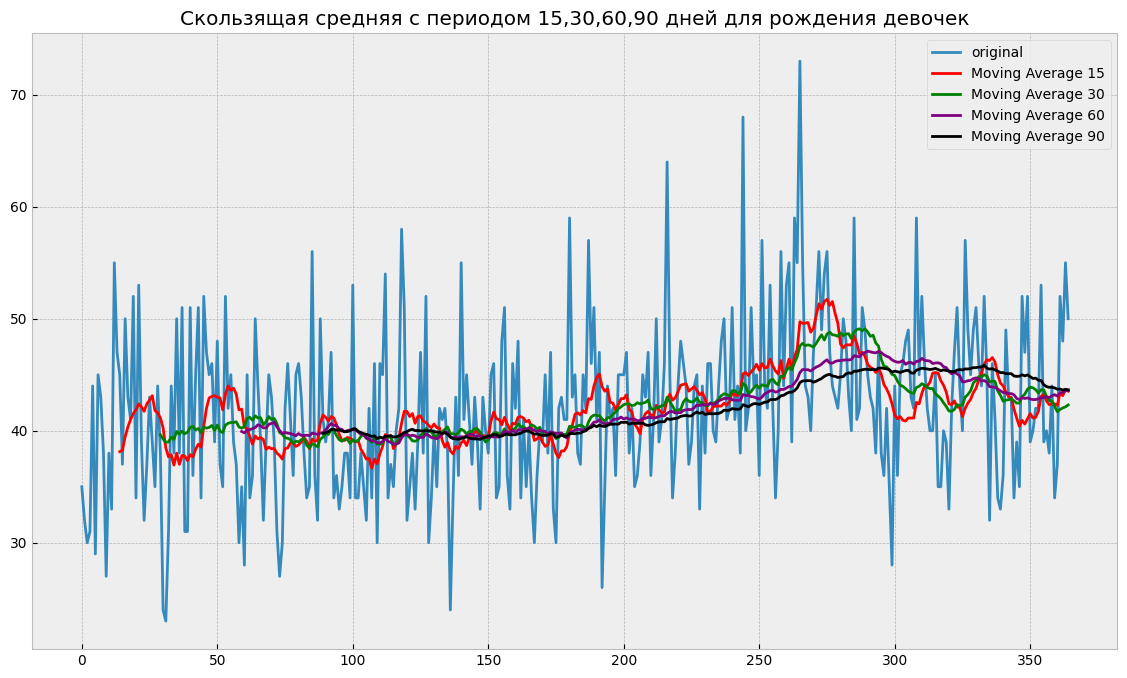

In [17]:
windows = [15,30,60,90]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series2, label='original')
    for i in range(len(windows)):
        ser = moving_average(series2, windows[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='Moving Average {}'.format(windows[i]))
    plt.title('Скользящая средняя с периодом 15,30,60,90 дней для рождения девочек')
    plt.legend()

In [18]:
#взвешенная скользящая средняя
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

In [19]:
#Генерируем ряд Фибоначи
def generate_fibonacci(n):
    fib_sequence = [1, 1]  # Начинаем с двух первых чисел ряда Фибоначчи
    while len(fib_sequence) < n:
        next_number = fib_sequence[-1] + fib_sequence[-2]
        fib_sequence.append(next_number)
    return fib_sequence 

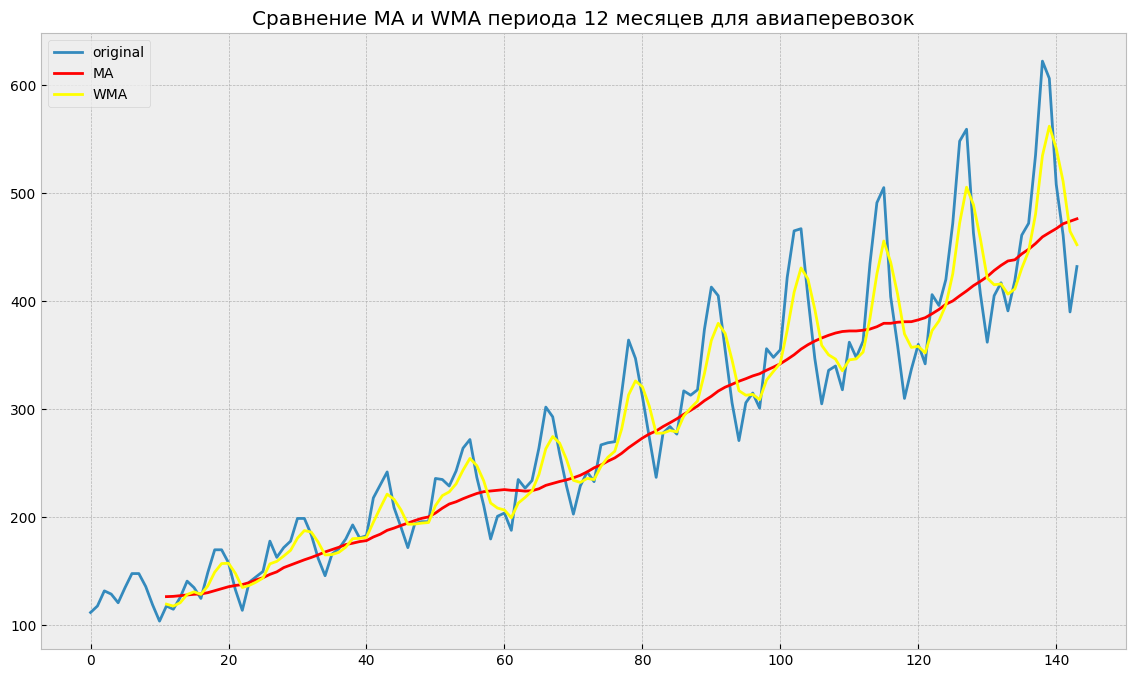

In [20]:
fib = generate_fibonacci(12)
wma = weighted_moving_average(series1, 12, fib)
ma = moving_average(series1, 12)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series1, label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='yellow', linewidth='2', label='WMA')
    plt.legend()
    plt.title('Сравнение MA и WMA периода 12 месяцев для авиаперевозок')
    plt.show()

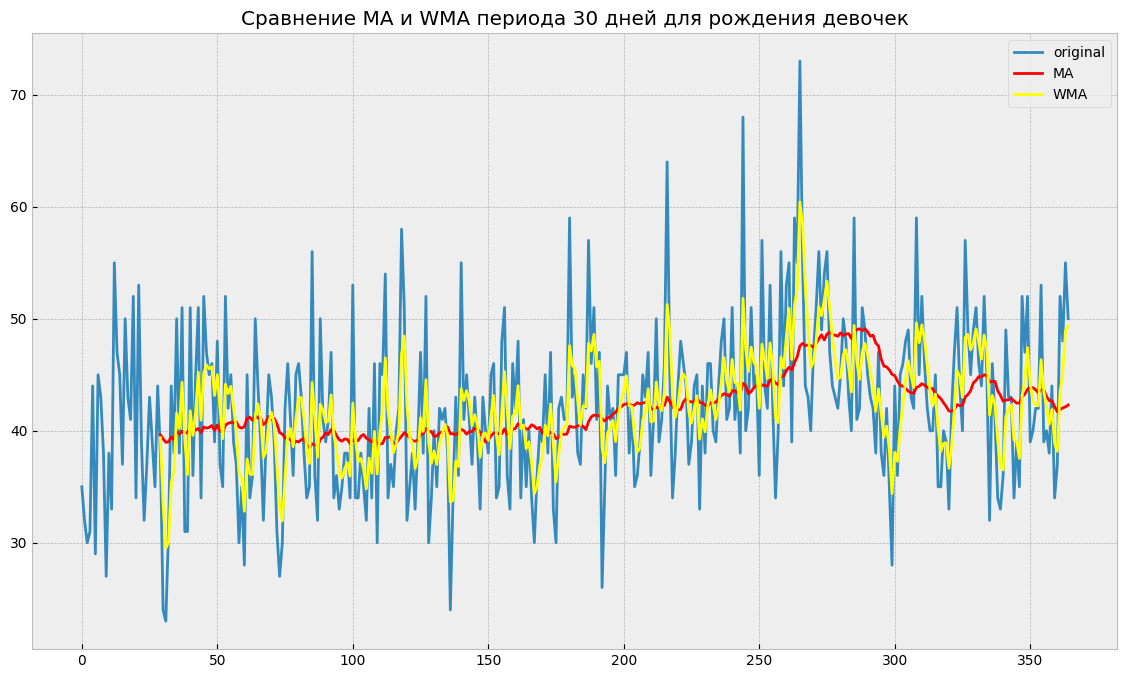

In [21]:
fib = generate_fibonacci(30)
wma = weighted_moving_average(series2, 30, fib)
ma = moving_average(series2, 30)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series2, label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='yellow', linewidth='2', label='WMA')
    plt.legend()
    plt.title('Сравнение MA и WMA периода 30 дней для рождения девочек')
    plt.show()

In [22]:
#Экспоненциальное сглаживание
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

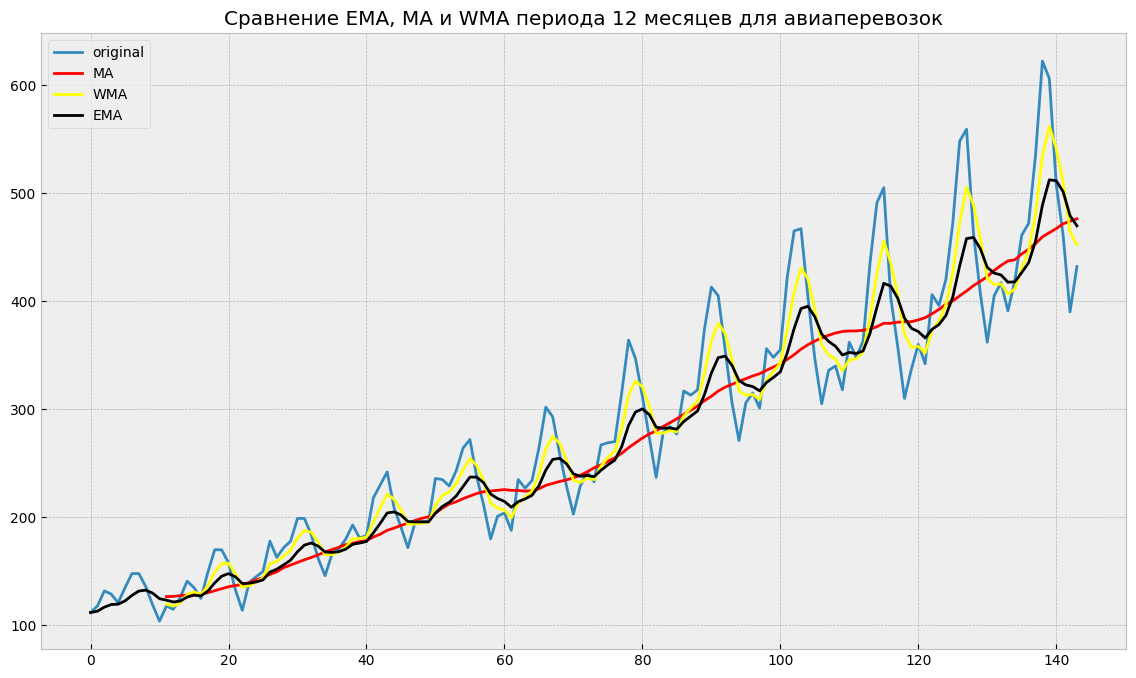

In [23]:
ema = exponential_moving_average(series1, 0.2)
fib = generate_fibonacci(12)
wma = weighted_moving_average(series1, 12, fib)
ma = moving_average(series1, 12)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series1, label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='yellow', linewidth='2', label='WMA')
    plt.plot(ema, color='black', linewidth='2', label='EMA')
    plt.legend()
    plt.title('Сравнение EMA, MA и WMA периода 12 месяцев для авиаперевозок')
    plt.show()

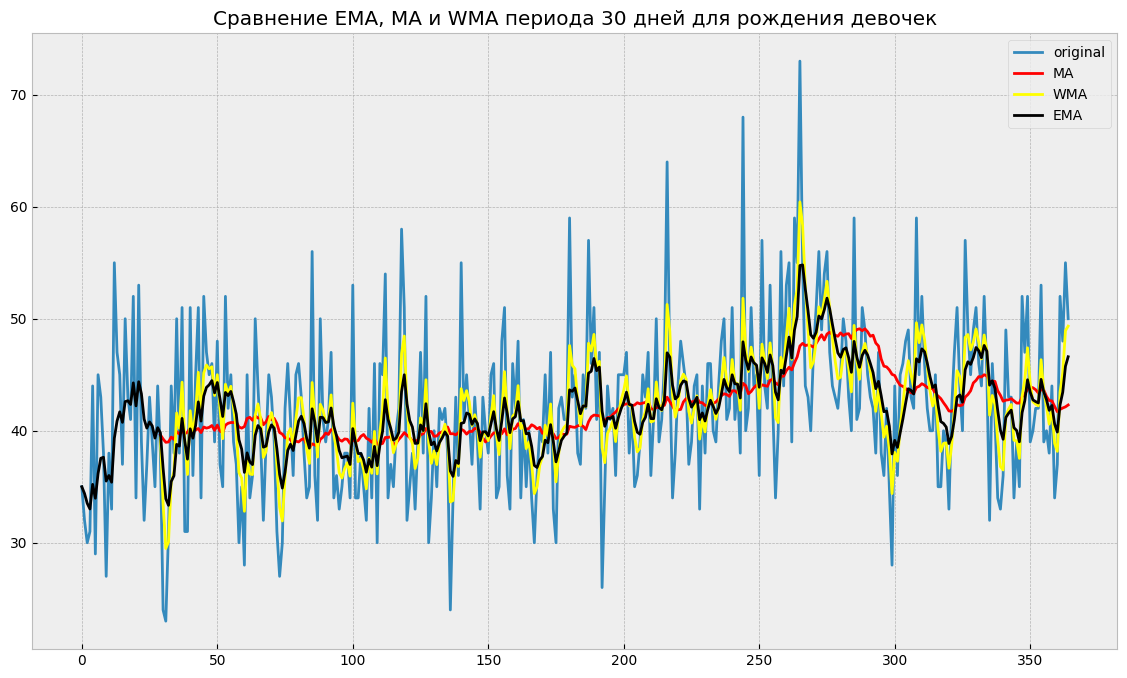

In [24]:
ema = exponential_moving_average(series2, 0.2)
fib = generate_fibonacci(30)
wma = weighted_moving_average(series2, 30, fib)
ma = moving_average(series2, 30)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series2, label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='yellow', linewidth='2', label='WMA')
    plt.plot(ema, color='black', linewidth='2', label='EMA')
    plt.legend()
    plt.title('Сравнение EMA, MA и WMA периода 30 дней для рождения девочек')
    plt.show()

In [25]:
#Двойное экспоненциальное сглаживание
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

In [26]:
def plot_dema(series, alpha, beta):
    dema = double_ema(series, alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(series, label='original')
        plt.plot(dema, color='red', linewidth='2', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

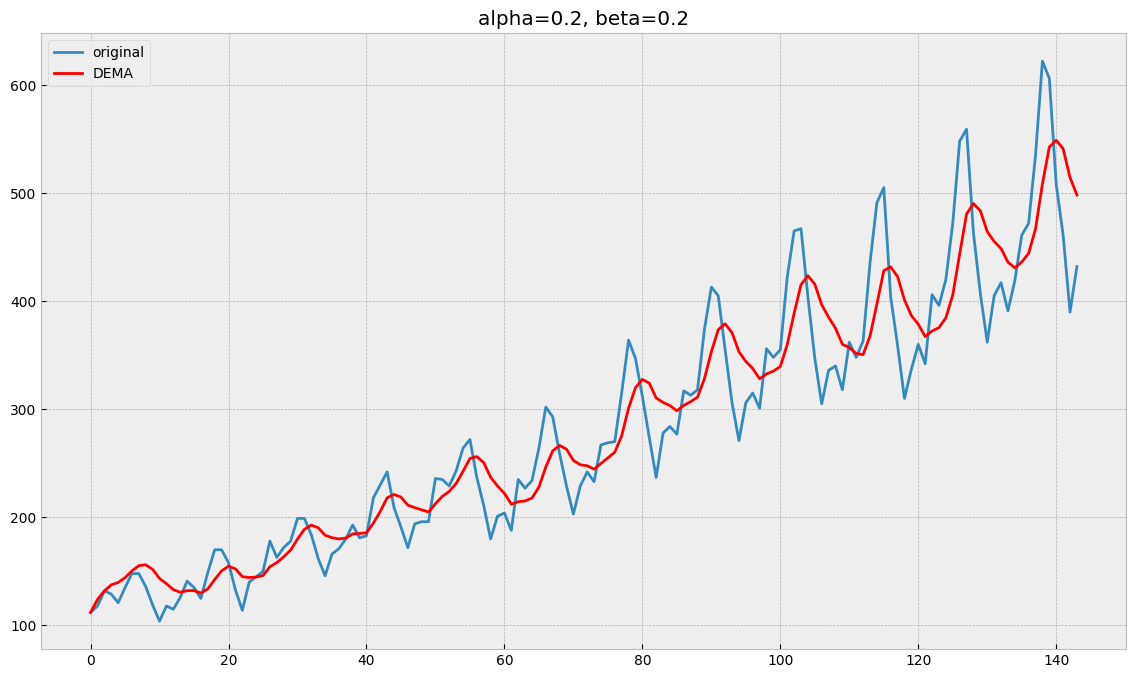

In [27]:
plot_dema(series1, 0.2, 0.2)

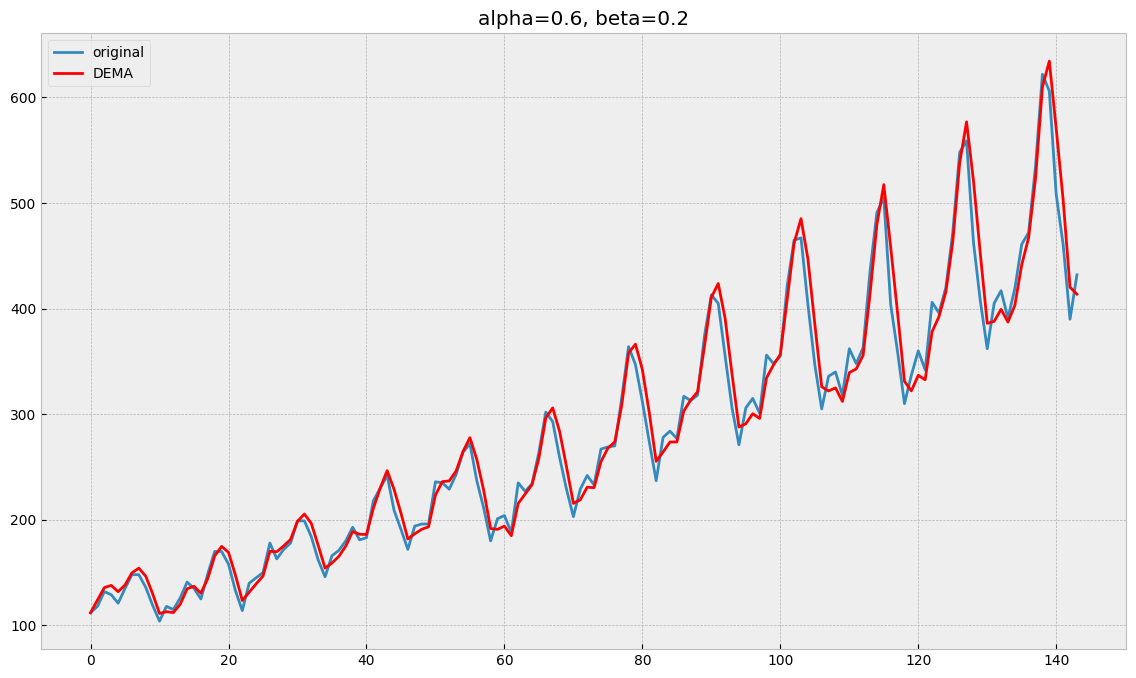

In [28]:
plot_dema(series1, 0.6, 0.2)

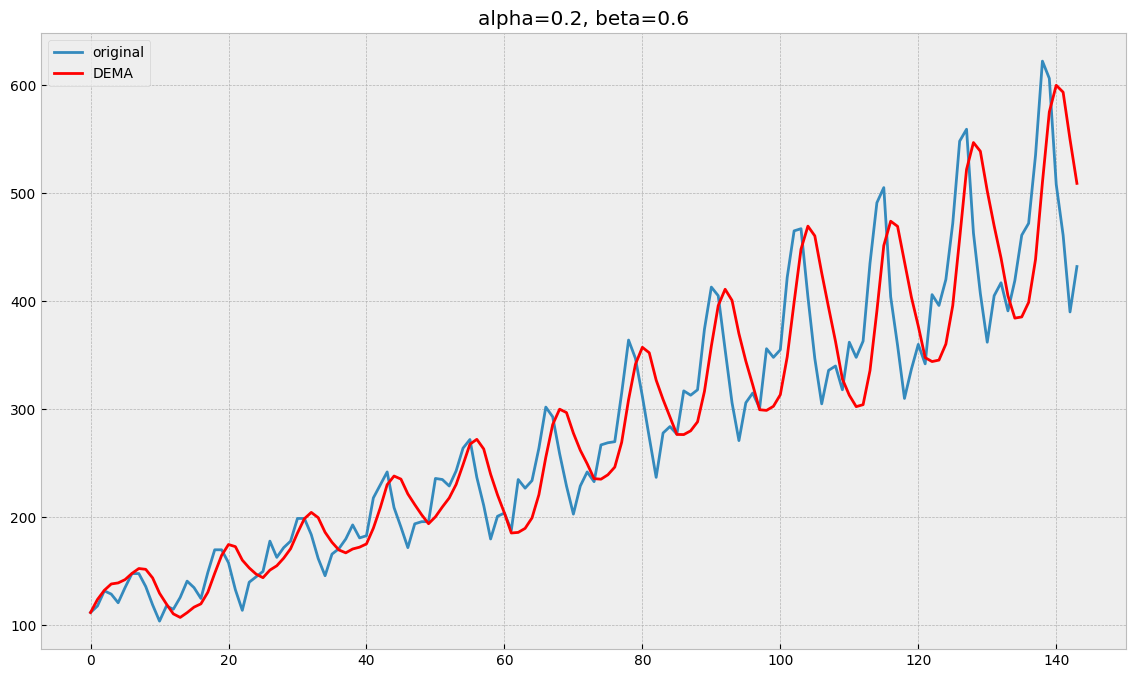

In [29]:
plot_dema(series1, 0.2, 0.6)

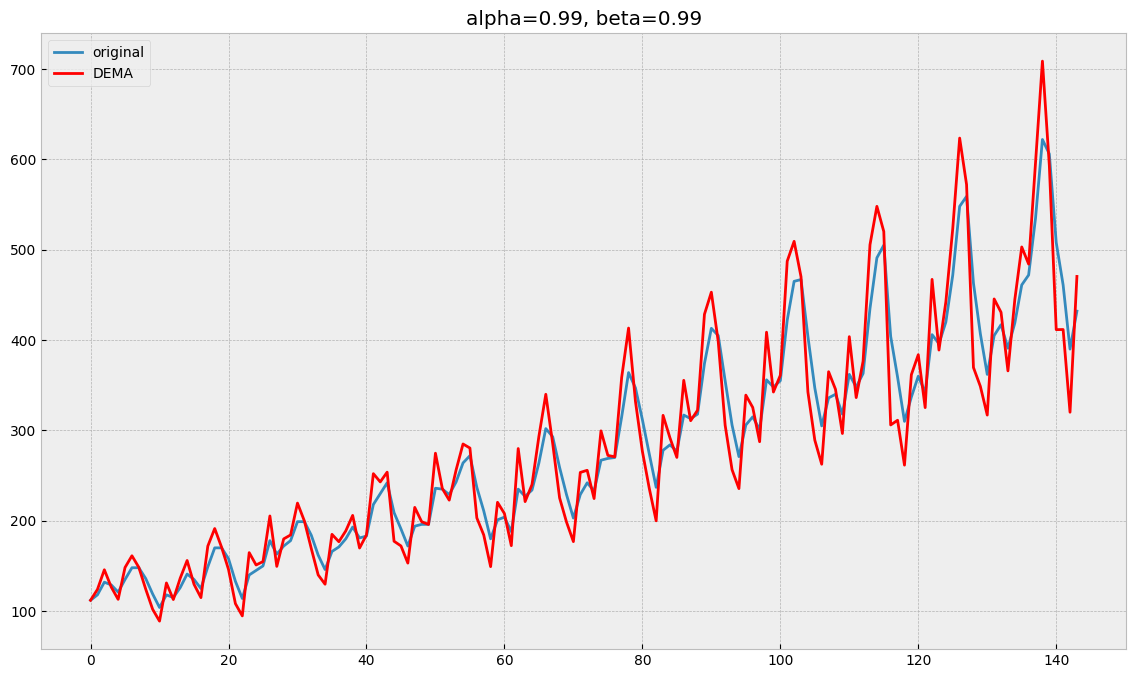

In [30]:
plot_dema(series1, 0.99, 0.99)

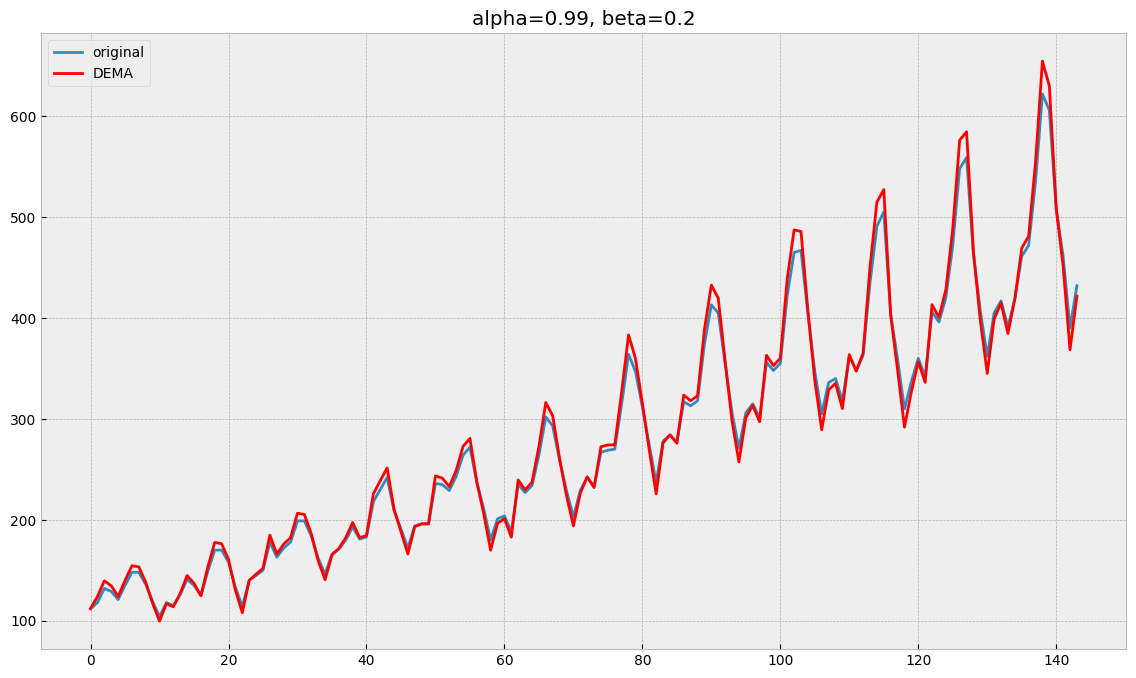

In [31]:
plot_dema(series1, 0.99, 0.2)

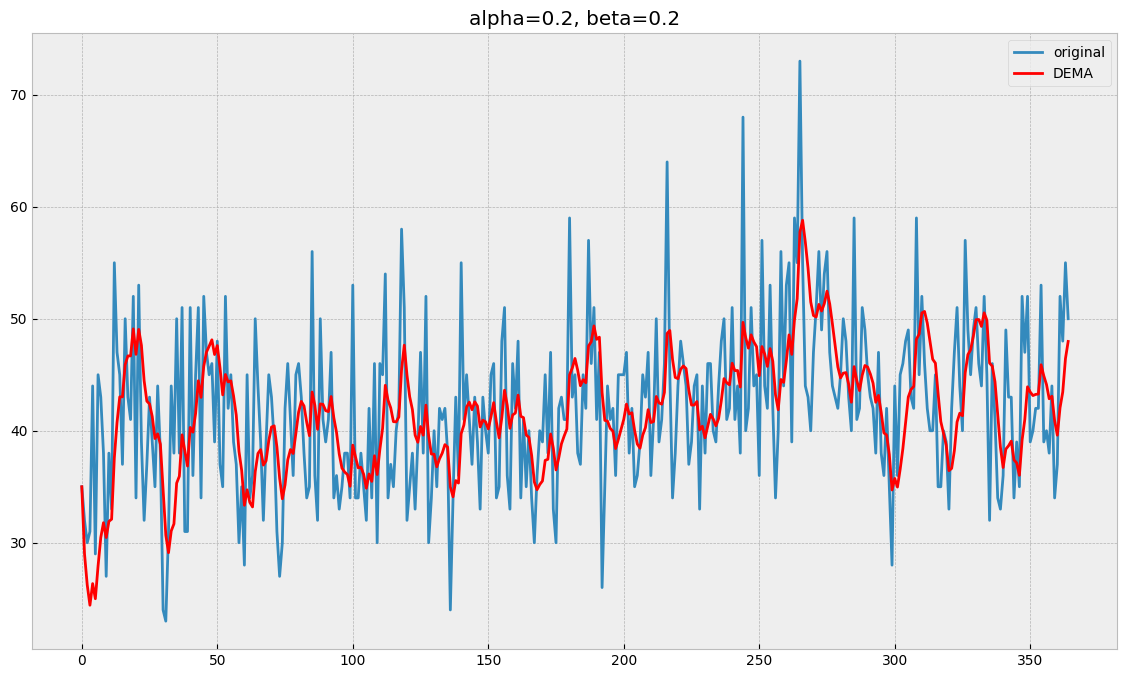

In [32]:
#для девочек
plot_dema(series2, 0.2, 0.2)

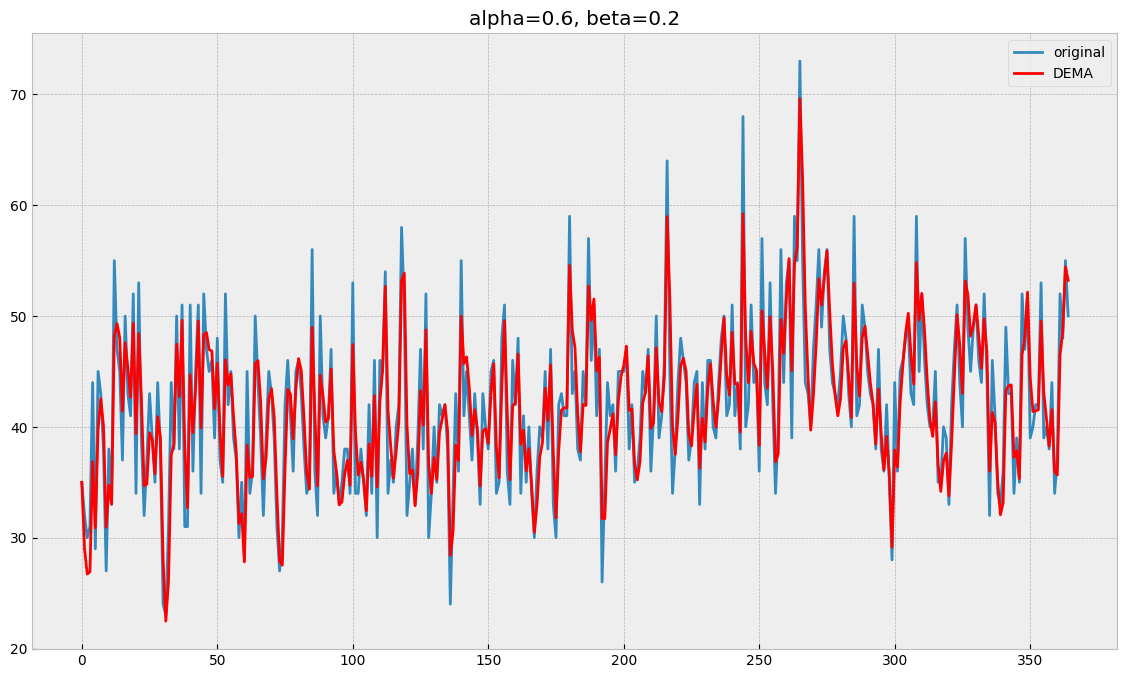

In [33]:
plot_dema(series2, 0.6, 0.2)

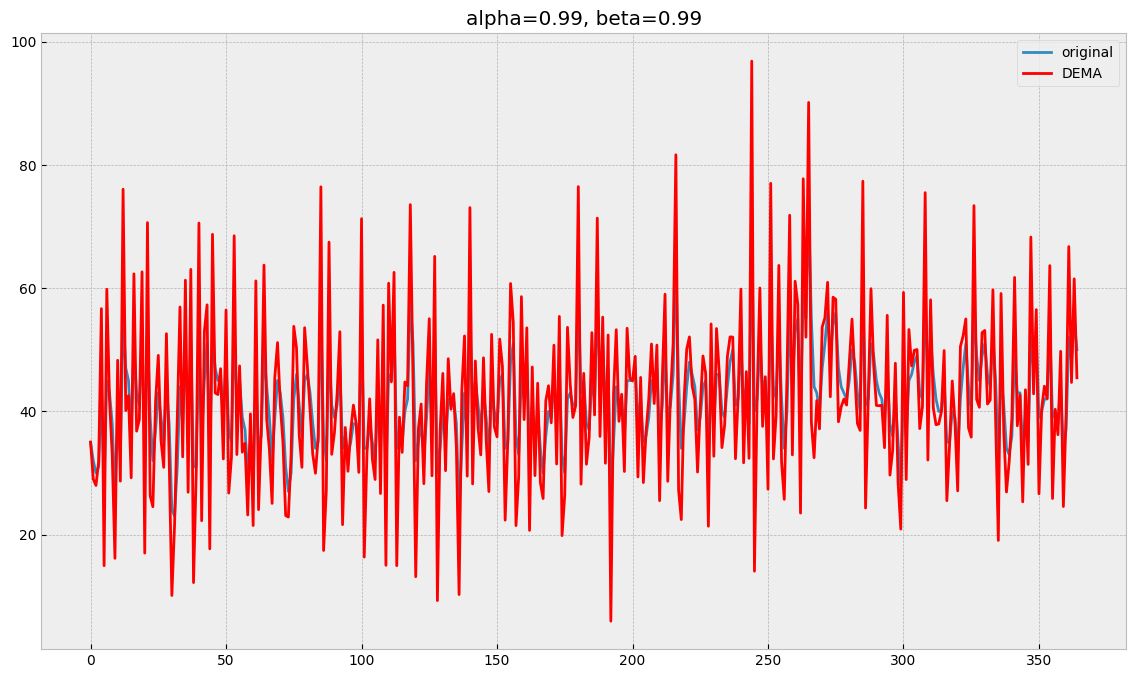

In [34]:
plot_dema(series2, 0.99, 0.99)

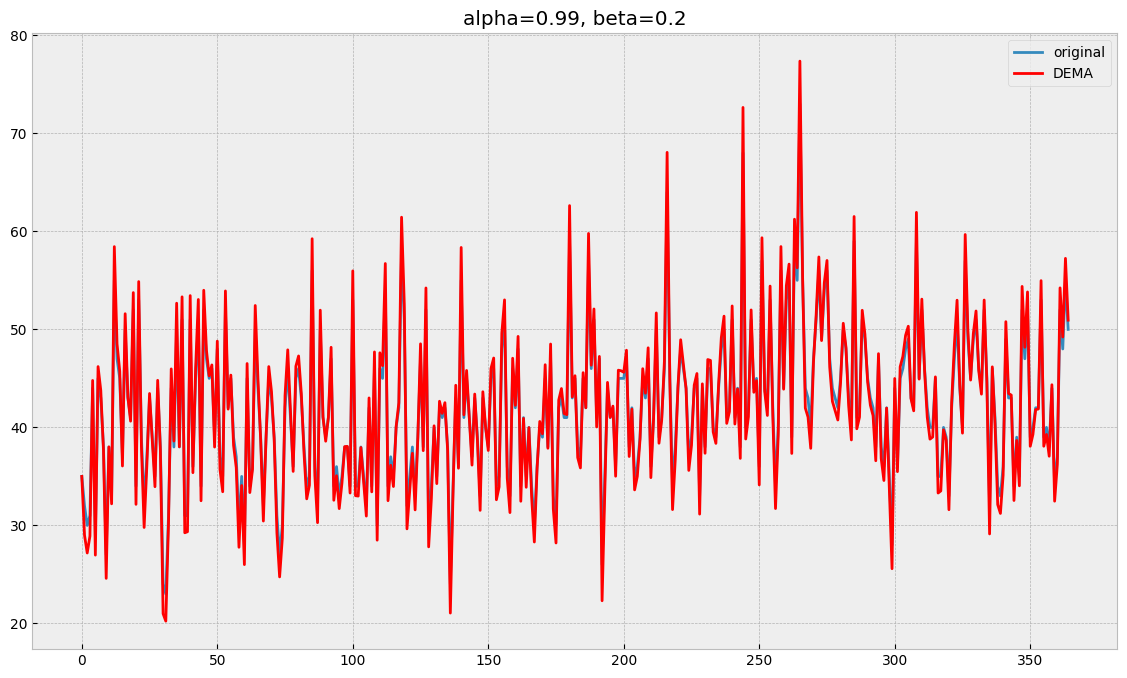

In [35]:
plot_dema(series2, 0.99, 0.2)

In [36]:
#Хольт-Винтерс
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result


In [37]:
def plot_tema(alpha, beta, gamma, ser, ser_to_plot, period, n_preds):
    tema = triple_exponential_smoothing(ser, period, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot,label='original')
        plt.plot(tema, color='red', linewidth='2', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

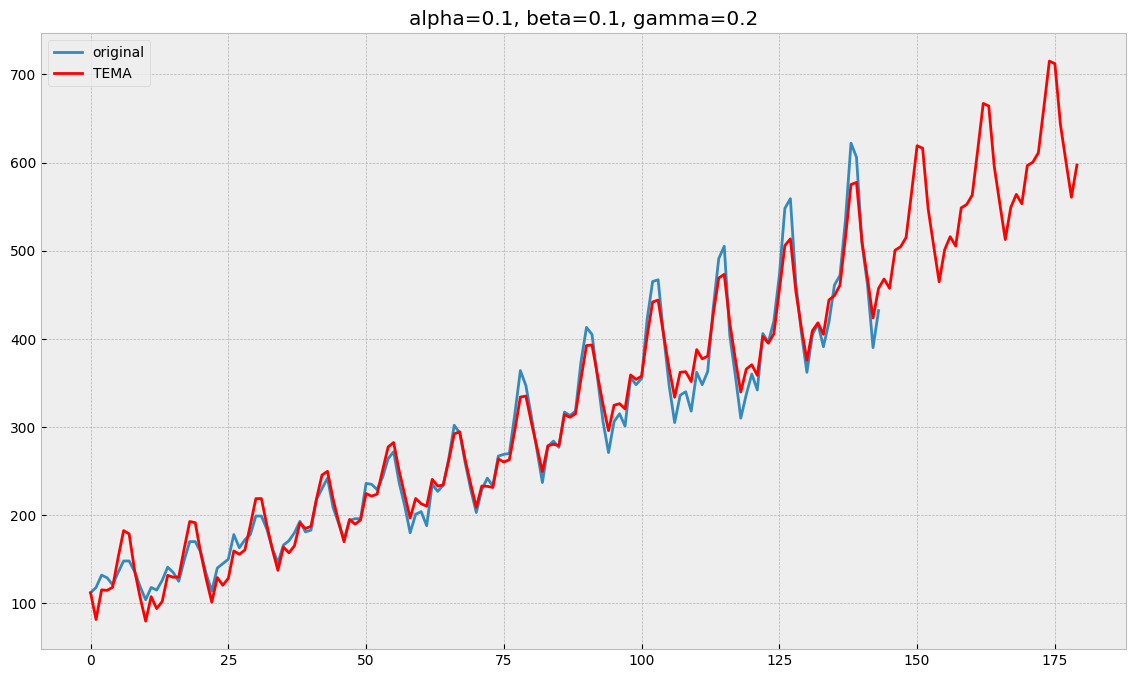

In [38]:
plot_tema(0.1, 0.1, 0.2, series1, series1, 12, 36)

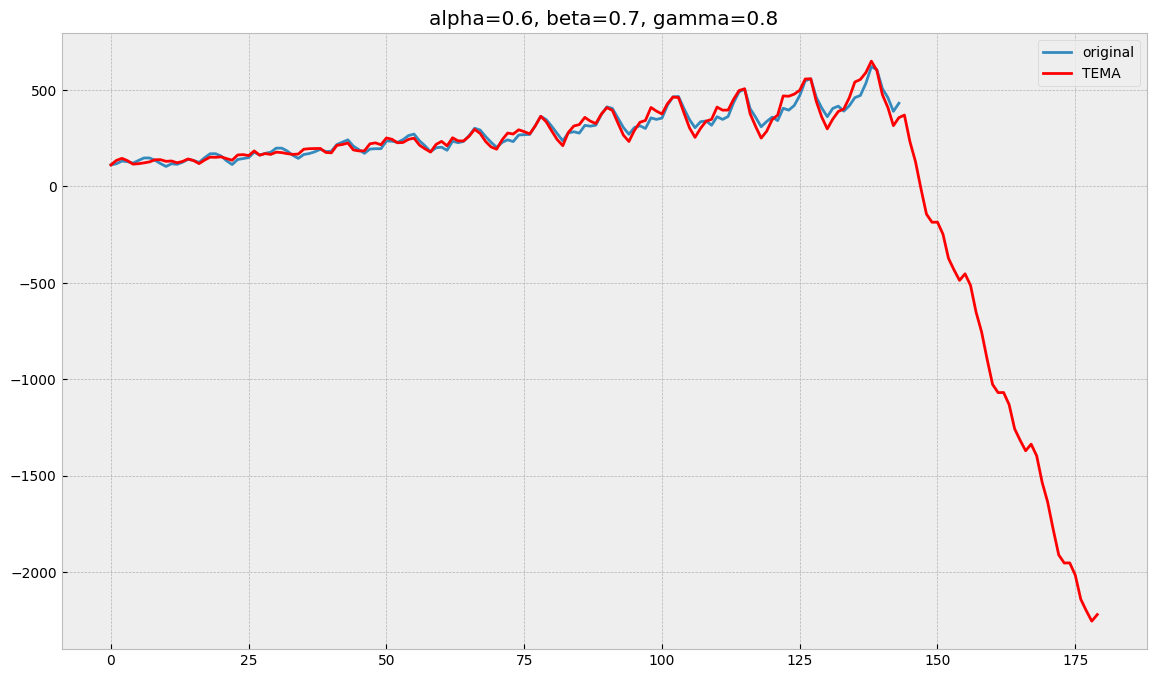

In [39]:
plot_tema(0.6, 0.7, 0.8, series1, series1, 12, 36)

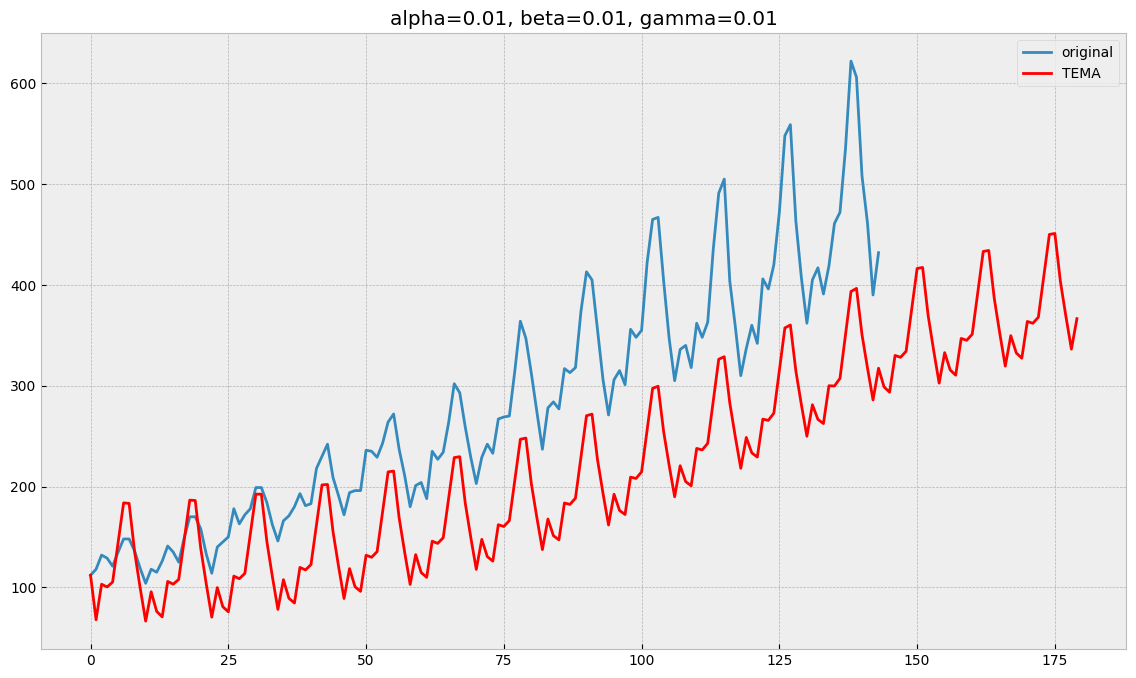

In [40]:
plot_tema(0.01, 0.01, 0.01, series1, series1, 12, 36)

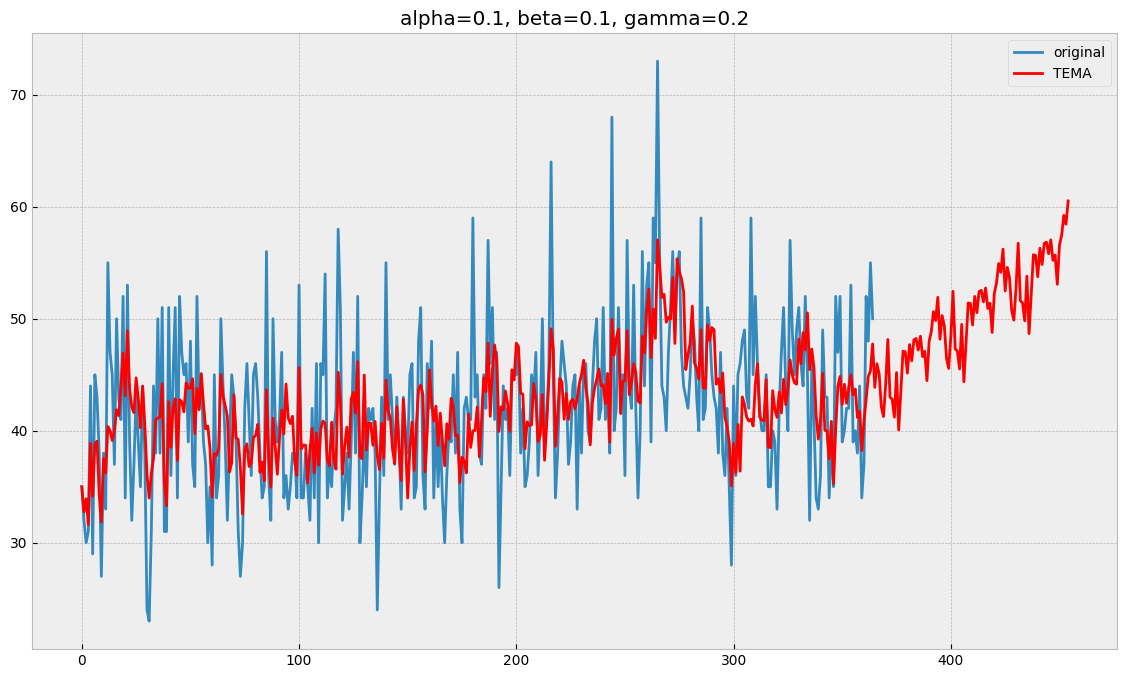

In [41]:
#for grils
plot_tema(0.1, 0.1, 0.2, series2, series2, 30, 90)

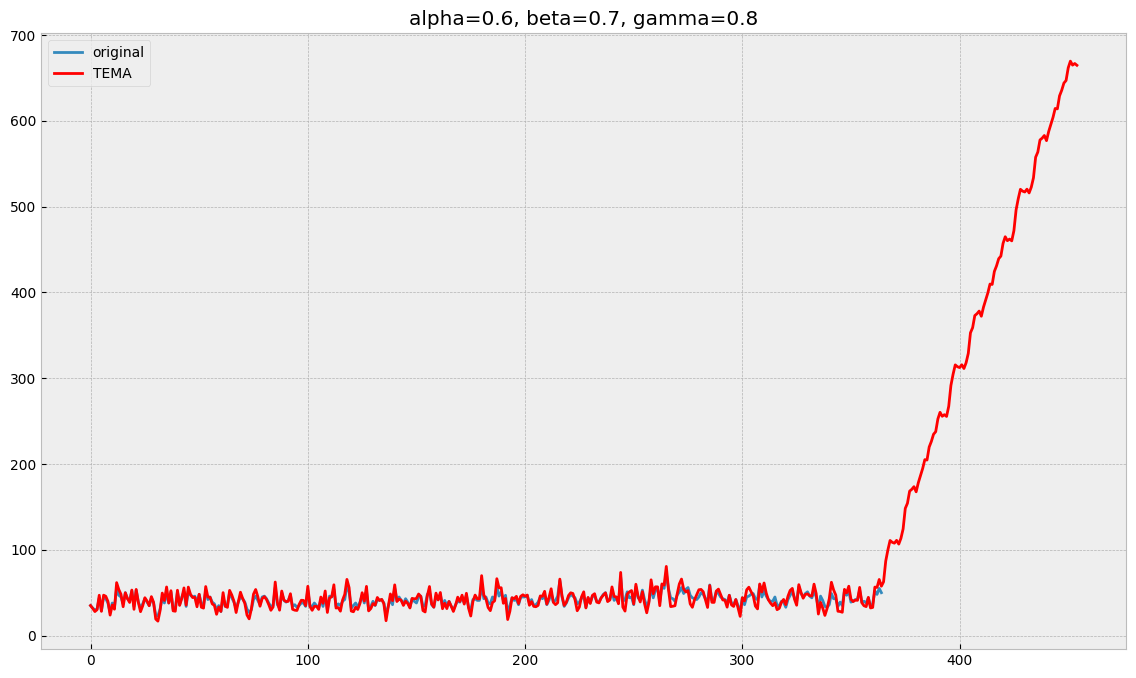

In [42]:
plot_tema(0.6, 0.7, 0.8, series2, series2, 30, 90)

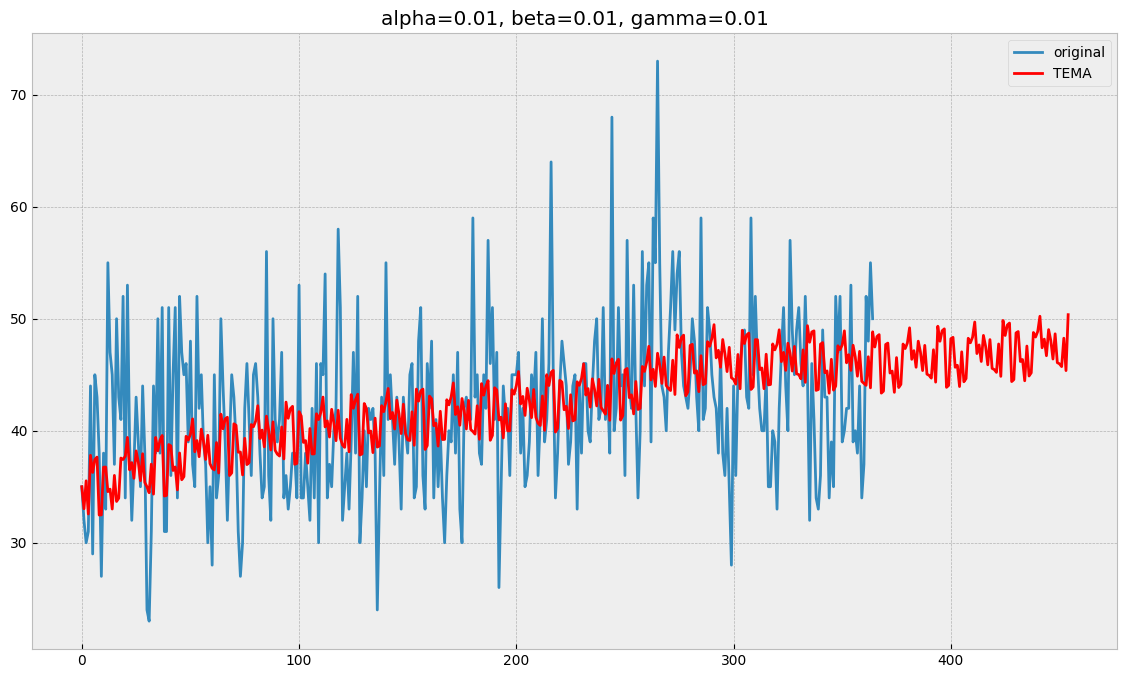

In [43]:
plot_tema(0.01, 0.01, 0.01, series2, series2, 30, 90)

In [44]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Анализ International airline passengers: monthly totals in thousands


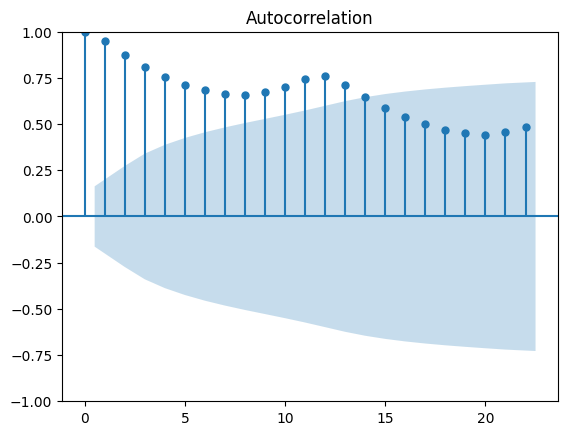

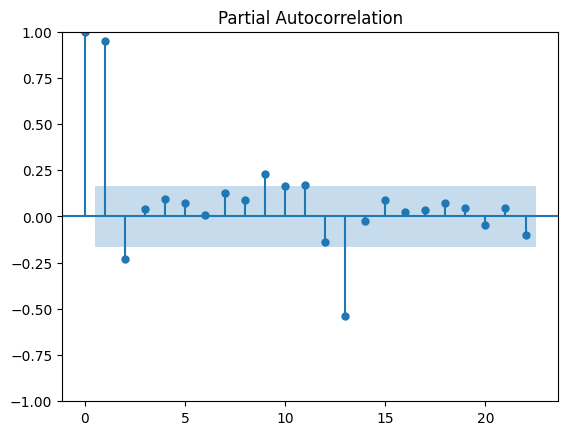

Анализ Daily total female births in California


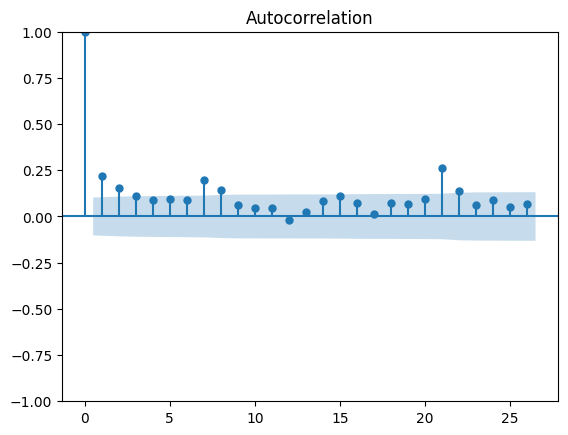

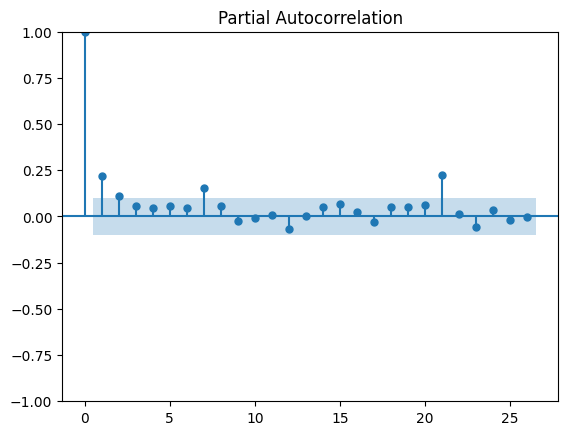

In [45]:
for key, column in all_series.items():
    print(f"Анализ {key}")
    plot_acf(column)
    plot_pacf(column)
    plt.show()

In [46]:
# Стационарный ряд
model_ma_stationary = ARIMA(series2, order=(0, 0, 1))
result_ma_stationary = model_ma_stationary.fit()
print("MA модель для стационарного ряда:\n", result_ma_stationary.summary())

# Нестационарный ряд
model_ma_non_stationary = ARIMA(series1, order=(0, 1, 1))  # Добавляем разложение тренда
result_ma_non_stationary = model_ma_non_stationary.fit()
print("MA модель для нестационарного ряда:\n", result_ma_non_stationary.summary())


MA модель для стационарного ряда:
                                SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                  365
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1238.270
Date:                Wed, 29 May 2024   AIC                           2482.539
Time:                        10:06:36   BIC                           2494.239
Sample:                             0   HQIC                          2487.189
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9808      0.468     89.650      0.000      41.063      42.899
ma.L1          0.1782      0.053      3.334      0.001       0.073       0.283
sigma2        51.

In [47]:
print("AIC для стационарного ряда:", result_ma_stationary.aic)
print("BIC для стационарного ряда:", result_ma_stationary.bic)
print("AIC для нестационарного ряда:", result_ma_non_stationary.aic)
print("BIC для нестационарного ряда:", result_ma_non_stationary.bic)

AIC для стационарного ряда: 2482.53914597702
BIC для стационарного ряда: 2494.2388380377674
AIC для нестационарного ряда: 1397.2575749491893
BIC для нестационарного ряда: 1403.1832642097093


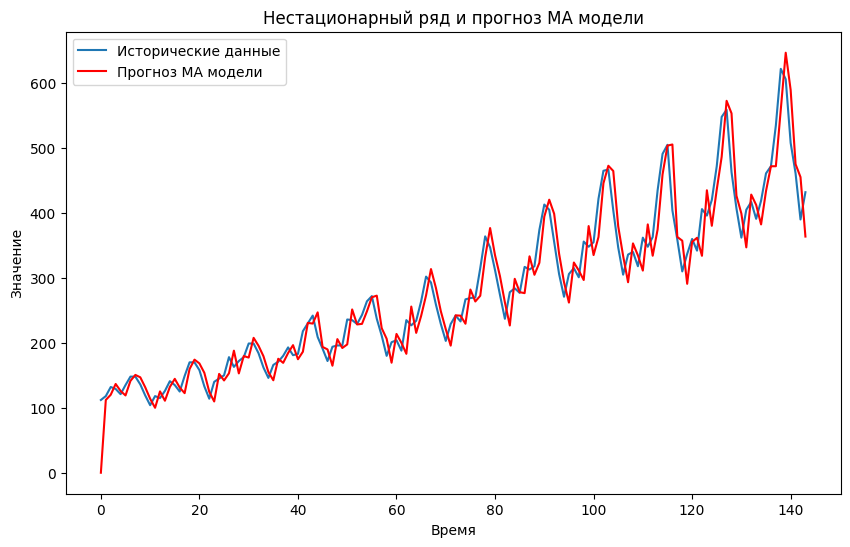

In [48]:
# График для нестационарного ряда
plt.figure(figsize=(10, 6))
plt.plot(series1, label='Исторические данные')
plt.plot(result_ma_non_stationary.fittedvalues, color='red', label='Прогноз MA модели')
plt.title('Нестационарный ряд и прогноз MA модели')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

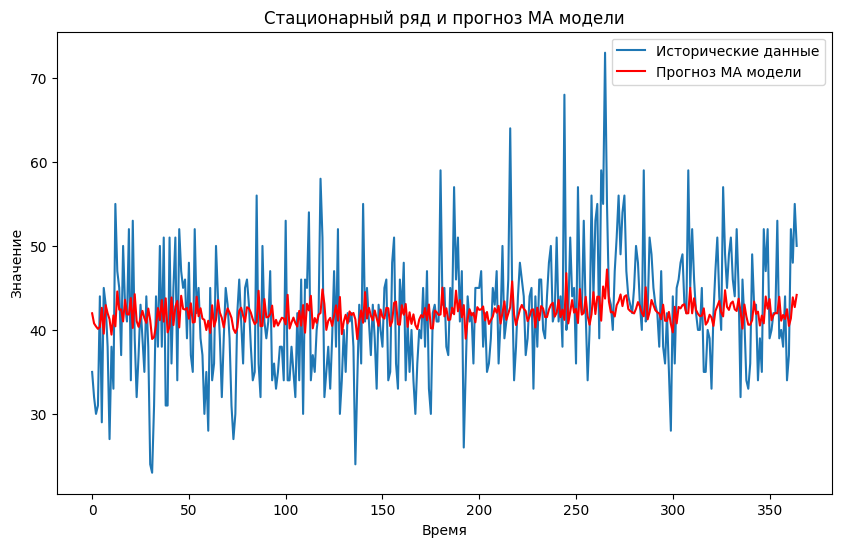

In [49]:
# График для стационарного ряда
plt.figure(figsize=(10, 6))
plt.plot(series2, label='Исторические данные')
plt.plot(result_ma_stationary.fittedvalues, color='red', label='Прогноз MA модели')
plt.title('Стационарный ряд и прогноз MA модели')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.show()

Для сглаживания временные рядов представленных в работе, не плохо мотходят двойное экспонециальное сглаживание, а так же метод Хольт-Винтерс, которые в зависимости от параметров не плохо прогнозируют динамику временных рядов. 